In [113]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

## Reload the model h5 format

In [114]:
from tensorflow.keras.models import load_model

In [115]:
model_path='Saved Model/CNN_VIS_0.9833333492279053_model_1619112578.h5'
reload_model=load_model(model_path)
reload_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [116]:
model=reload_model

In [117]:
model.layers

## Image Class
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

## Testing a random image

In [118]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[9.9916506e-01 4.0182529e-04 4.2373345e-06 3.7426292e-07 9.7581084e-05
  3.3083680e-04]]
0


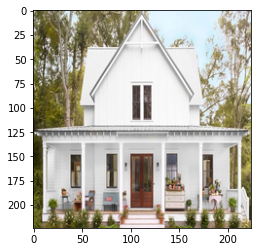

In [119]:
random_image=image.load_img('Images/building_house5.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

In [120]:
"""
input_image=cv2.imread('Images/building_house5.png')
rgb_image=cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
"""


"\ninput_image=cv2.imread('Images/building_house5.png')\nrgb_image=cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)\nplt.imshow(rgb_image)\n"

In [121]:
"""
test_image=rgb_image.reshape((1,)+rgb_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))
"""


"\ntest_image=rgb_image.reshape((1,)+rgb_image.shape)\ntest_image=test_image/255.0\nprint(test_image.shape)\npredicted_class=model.predict(test_image)\nprint(predicted_class)\n#print('True classification')\nprint(np.argmax(predicted_class))\n"

## Convolution Filter Visualization: 
- Convolution 3x3

In [122]:
layer=model.layers
layer

## Convolution: 0

In [123]:
filters,biases=model.layers[0].get_weights()
print(layer[0].name,filters.shape)

conv2d (3, 3, 3, 32)


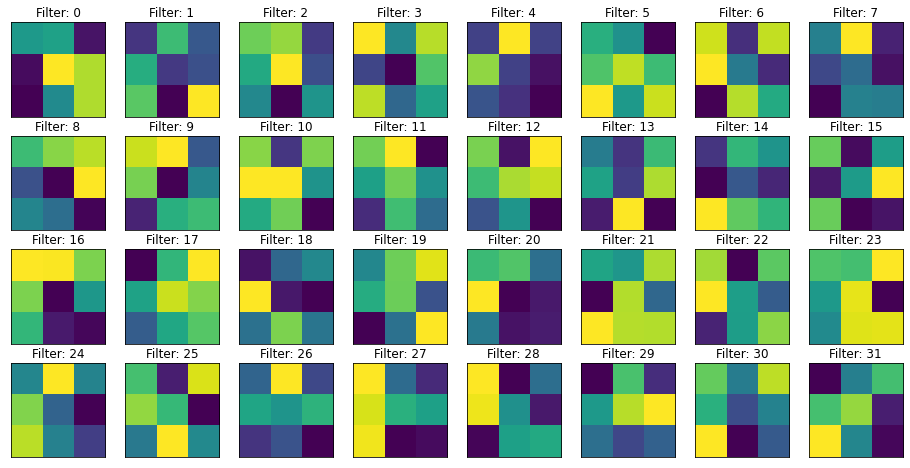

In [124]:
fig=plt.figure(figsize=(16, 8))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(1,n_filters+1):
    fig.add_subplot(rows, columns, i)
    f = filters[:, :, :, i-1]
    plt.xticks([]) 
    plt.yticks([])
    plt.title('Filter: '+str(i-1))
    plt.imshow(f[:, :, 0])
plt.show()  

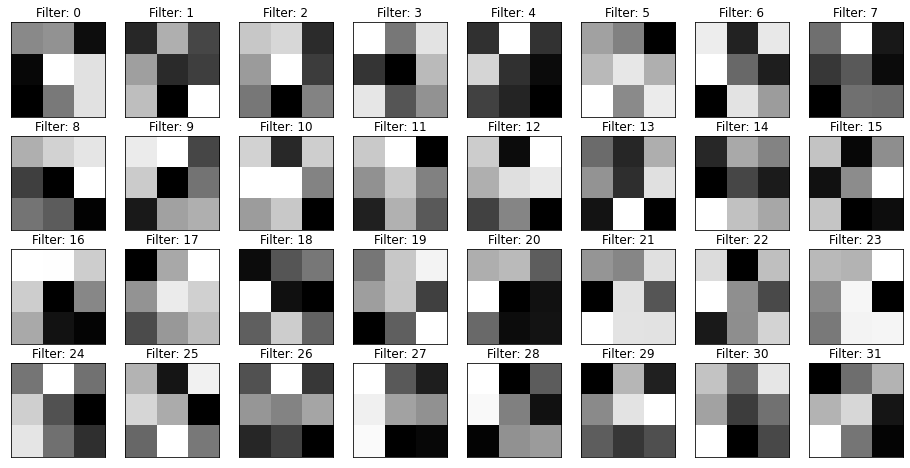

In [125]:
fig=plt.figure(figsize=(16, 8))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(1,n_filters+1):
    fig.add_subplot(rows, columns, i)
    f = filters[:, :, :, i-1]
    plt.xticks([]) 
    plt.yticks([])
    plt.title('Filter: '+str(i-1))
    plt.imshow(f[:, :, 0],cmap='gray')
plt.show()  

## Convolution: 1

In [126]:
filters_1,biases_1=model.layers[2].get_weights()
print(layer[2].name,filters_1.shape)

conv2d_1 (3, 3, 32, 64)


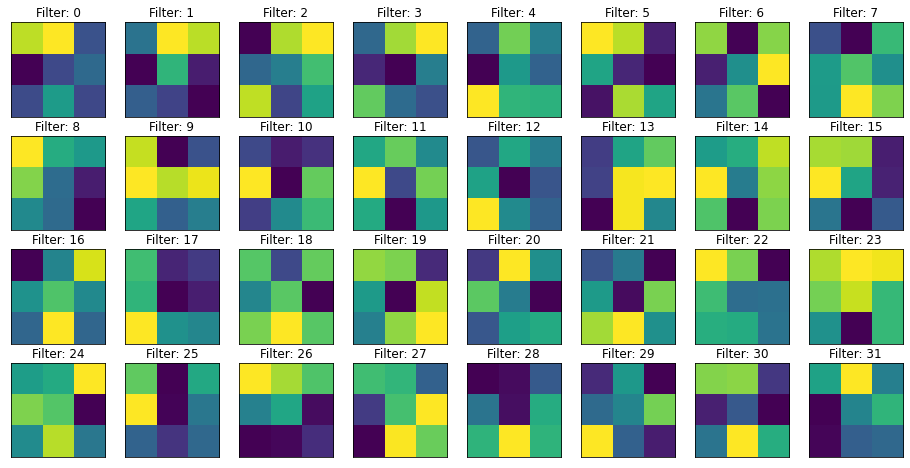

In [127]:
fig=plt.figure(figsize=(16, 8))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(1,n_filters+1):
    fig.add_subplot(rows, columns, i)
    f = filters_1[:, :, :, i-1]
    plt.xticks([]) 
    plt.yticks([])
    plt.title('Filter: '+str(i-1))
    plt.imshow(f[:, :, 0])
plt.show()  

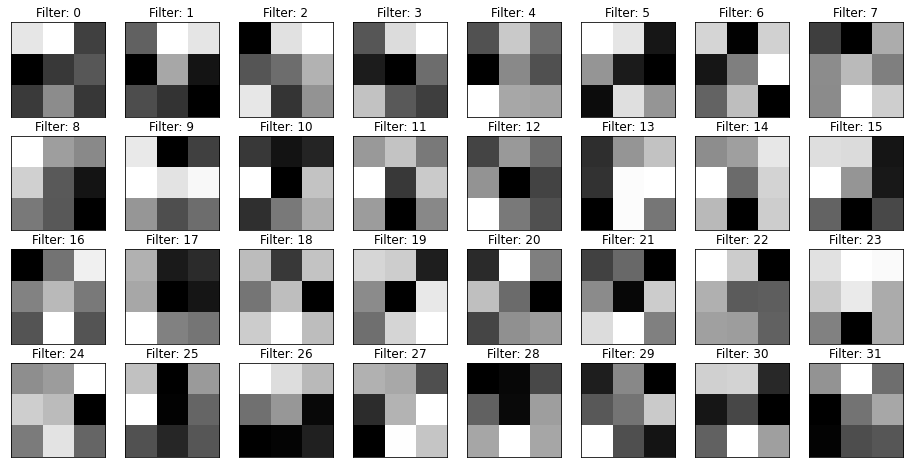

In [128]:
fig=plt.figure(figsize=(16, 8))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(1,n_filters+1):
    fig.add_subplot(rows, columns, i)
    f = filters_1[:, :, :, i-1]
    plt.xticks([]) 
    plt.yticks([])
    plt.title('Filter: '+str(i-1))
    plt.imshow(f[:, :, 0],cmap='gray')
plt.show()  

## Layers Visualization

In [129]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'dropout', 'flatten', 'dense', 'dropout_1', 'dense_1']


In [130]:
model_layers

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'dropout',
 'flatten',
 'dense',
 'dropout_1',
 'dense_1']

In [131]:
from tensorflow.keras.models import Model

## Convolutional Layers Implementation

In [132]:
conv2d_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d').output)
conv2d_1_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
conv2d_2_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
conv2d_3_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)

In [133]:
conv2d_features=conv2d_ouput.predict(test_image)
conv2d_1_features=conv2d_1_ouput.predict(test_image)
conv2d_2_features=conv2d_2_ouput.predict(test_image)
conv2d_3_features=conv2d_3_ouput.predict(test_image)
print('Conv layer feature output shape: ',conv2d_features.shape)
print('Conv_1 layer feature output shape: ',conv2d_1_features.shape)
print('Conv_2 layer feature output shape: ',conv2d_2_features.shape)
print('Conv_3 layer feature output shape: ',conv2d_3_features.shape)

Conv layer feature output shape:  (1, 224, 224, 32)
Conv_1 layer feature output shape:  (1, 112, 112, 64)
Conv_2 layer feature output shape:  (1, 56, 56, 128)
Conv_3 layer feature output shape:  (1, 28, 28, 256)


## Maxpooling Layers Implementation

In [134]:
max_pooling_2d_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
max_pooling_2d_1_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
max_pooling_2d_2_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
max_pooling_2d_3_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_3').output)

In [135]:
maxpool2d_features=max_pooling_2d_output.predict(test_image)
maxpool2d_1_features=max_pooling_2d_1_output.predict(test_image)
maxpool2d_2_features=max_pooling_2d_2_output.predict(test_image)
maxpool2d_3_features=max_pooling_2d_3_output.predict(test_image)
print('Conv layer feature output shape: ',maxpool2d_features.shape)
print('Conv_1 layer feature output shape: ',maxpool2d_1_features.shape)
print('Conv_2 layer feature output shape: ',maxpool2d_2_features.shape)
print('Conv_3 layer feature output shape: ',maxpool2d_3_features.shape)

Conv layer feature output shape:  (1, 112, 112, 32)
Conv_1 layer feature output shape:  (1, 56, 56, 64)
Conv_2 layer feature output shape:  (1, 28, 28, 128)
Conv_3 layer feature output shape:  (1, 14, 14, 256)


## Dense Layer Implementation

In [136]:
dense_output=Model(inputs=model.input,outputs=model.get_layer('dense').output)
dense_1_output=Model(inputs=model.input,outputs=model.get_layer('dense_1').output)

In [137]:
dense_features=dense_output.predict(test_image)
dense_1_features=dense_1_output.predict(test_image)
print('Dense layer feature output shape: ',dense_features.shape)
print('Dense_1 layer feature output shape: ',dense_1_features.shape)

Dense layer feature output shape:  (1, 512)
Dense_1 layer feature output shape:  (1, 6)


## Layers Visualization
- conv2d
- max_pooling2d
- conv2d_1
- max_pooling2d_1
- conv2d_2
- max_pooling2d_2
- conv2d_3
- max_pooling2d_3
- dropout

## Convolution: 0

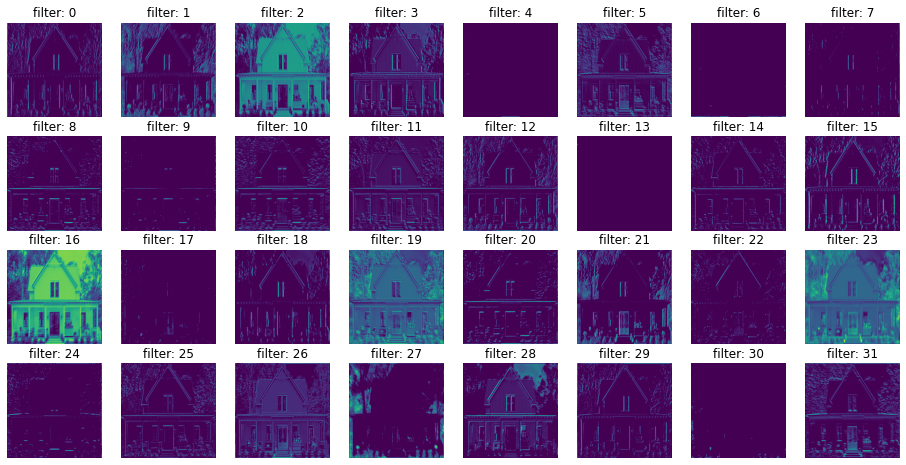

In [138]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_features[0, :, :, i])
plt.show()

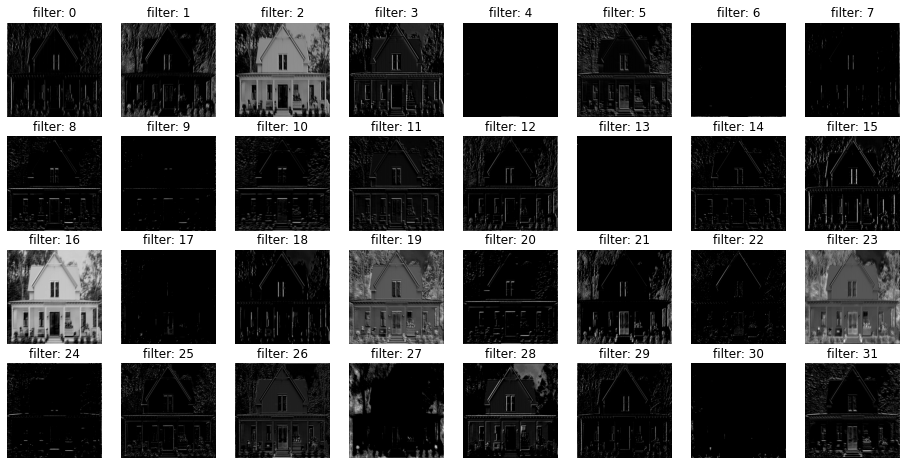

In [139]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_features[0, :, :, i],cmap='gray')
plt.show()

In [140]:
cv2.imshow('Filter',conv2d_features[0, :, :, 10])
cv2.waitKey()
cv2.destroyAllWindows()

## Maxpooling2D: 0

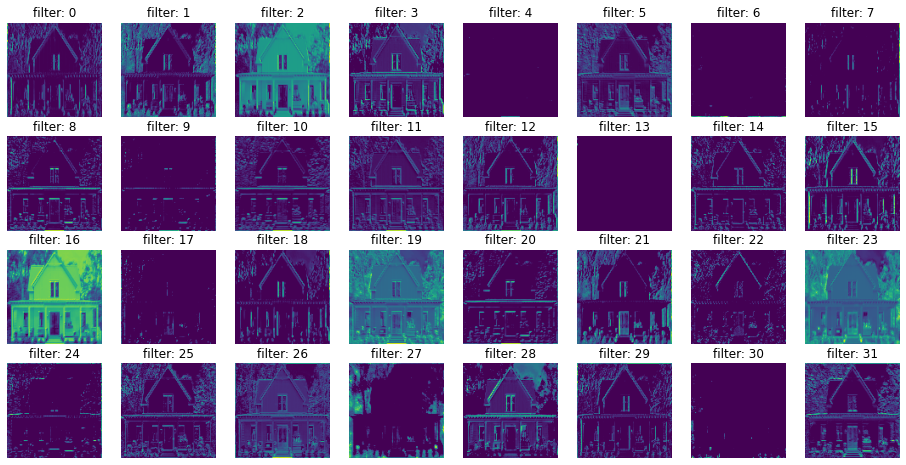

In [141]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_features[0, :, :, i])
plt.show()

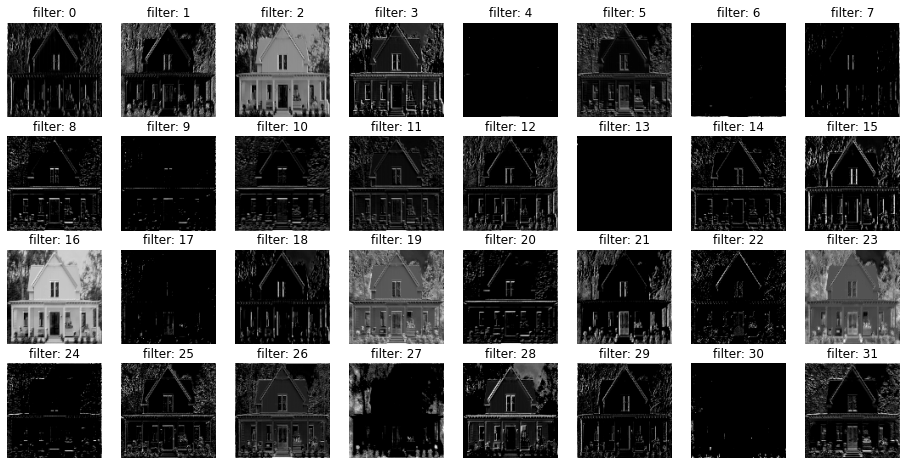

In [142]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_features[0, :, :, i],cmap='gray')
plt.show()

## Convolution: 1

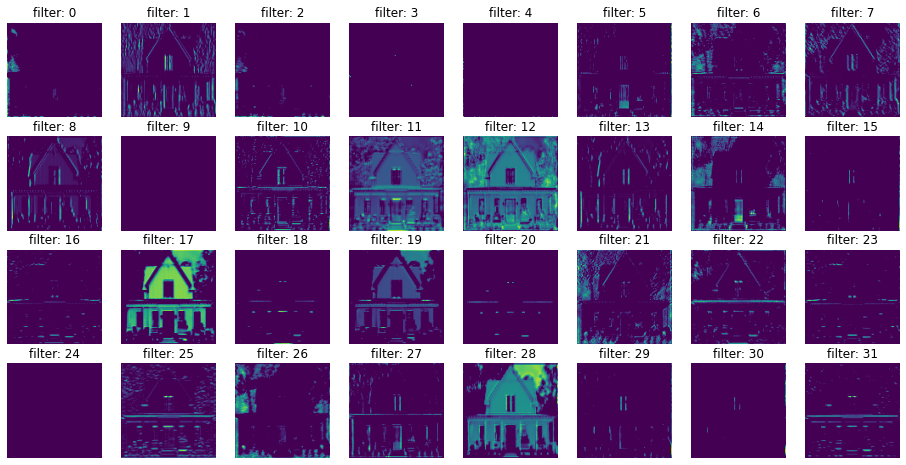

In [143]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_1_features[0, :, :, i])
plt.show()

## Maxpooling2D: 1

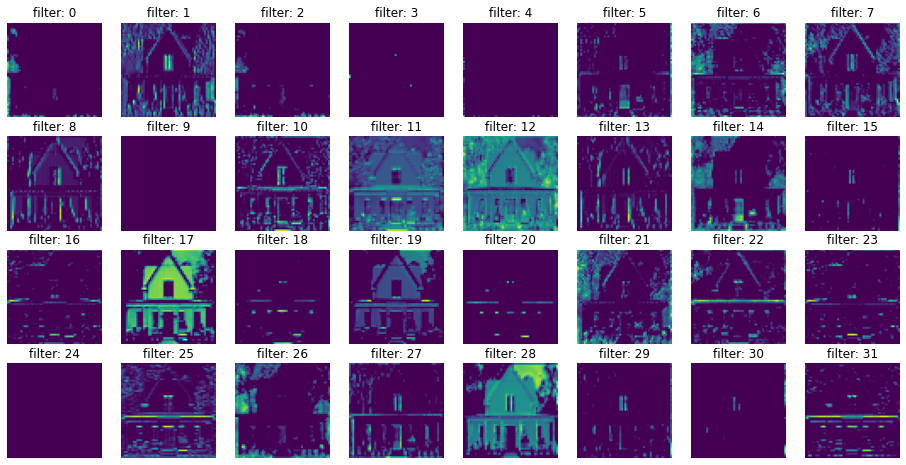

In [144]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_1_features[0, :, :, i])
plt.show()

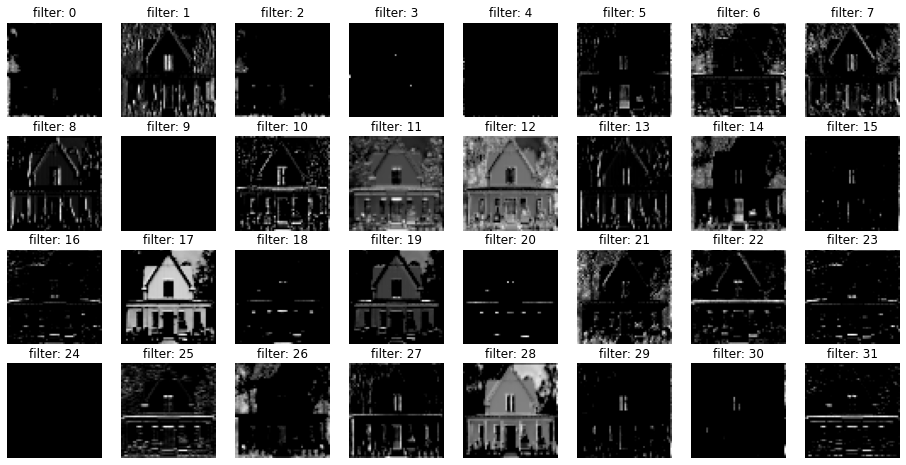

In [145]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_1_features[0, :, :, i],cmap='gray')
plt.show()

## Convolution: 2

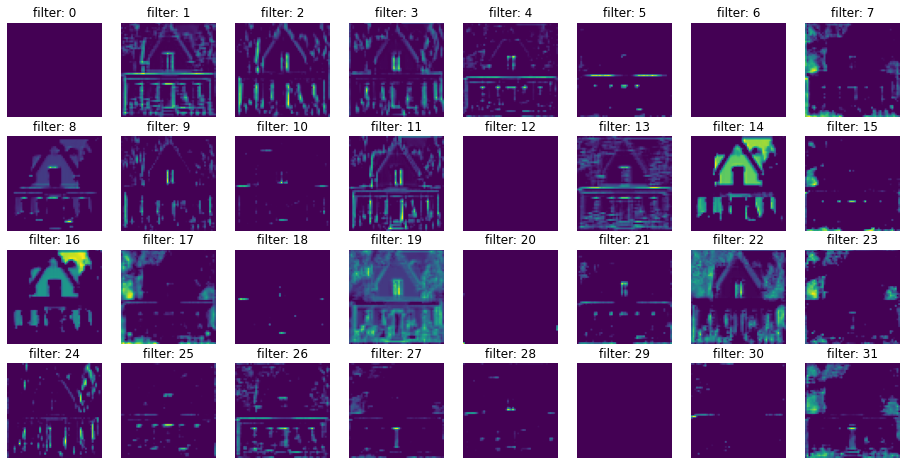

In [146]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_2_features[0, :, :, i])
plt.show()

## Maxpooling2D : 2

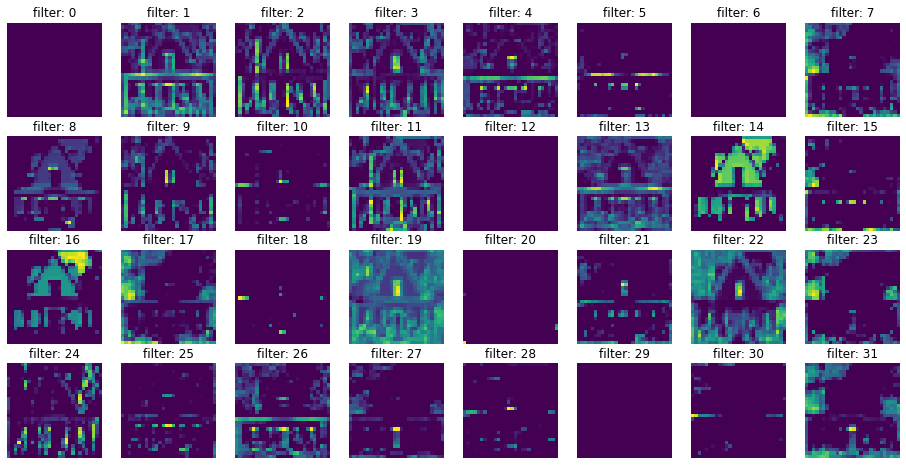

In [147]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_2_features[0, :, :, i])
plt.show()

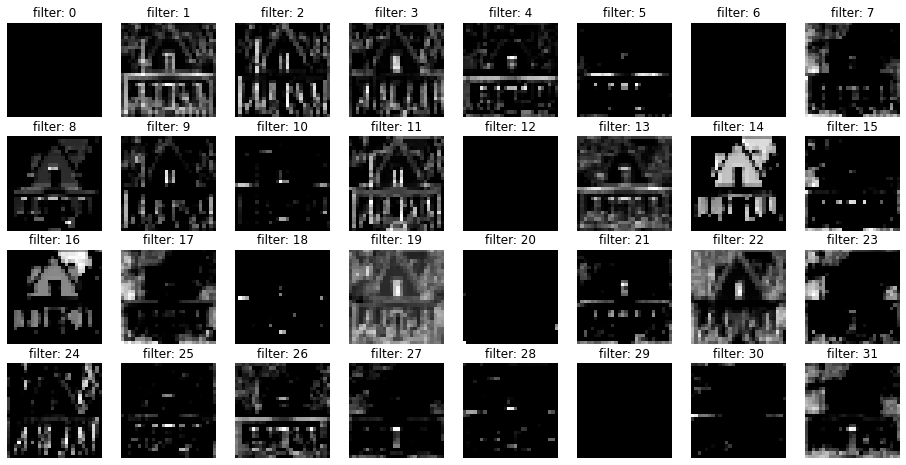

In [148]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_2_features[0, :, :, i],cmap='gray')
plt.show()

## Convolution: 3

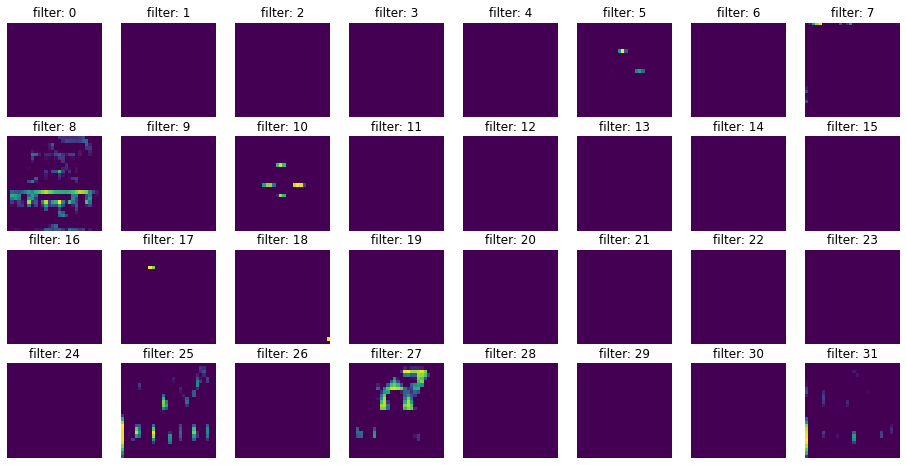

In [149]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_3_features[0, :, :, i])
plt.show()

## Maxpooling 2D: 3

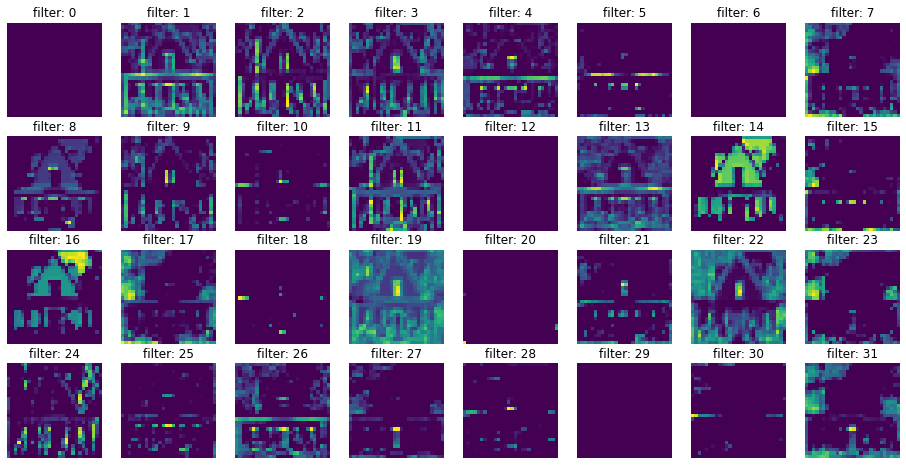

In [150]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_2_features[0, :, :, i])
plt.show()

## Features Dense: 0

In [151]:
dense_features.flatten()

array([1.0283713 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02498597, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.95962334, 1.9997762 , 0.        , 0.        , 0.        ,
       1.2645795 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 2.0329745 , 0.46188322,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.31065664, 0.6982668 , 0.35379678, 0.60906285, 0.        ,
       1.4044609 , 0.        , 0.        , 0.        , 2.739238  ,
       0.        , 0.        , 0.        , 0.        , 0.44804832,
       0.        , 2.7105544 , 0.        , 0.        , 1.3328345 ,
       0.        , 0.87514216, 1.5610485 , 0.        , 1.2476641 ,
       0.        , 0.935233  , 0.        , 0.        , 0.        ,
       1.7648567 , 0.        , 0.        , 0.        , 0.6860563 ,
       0.06782866, 1.6377159 , 0.        , 0.        , 2.01048

## Features Dense: 1

In [152]:
dense_1_features.flatten()

array([9.9916506e-01, 4.0182529e-04, 4.2373345e-06, 3.7426292e-07,
       9.7581084e-05, 3.3083680e-04], dtype=float32)

## Dropout Implementation

In [153]:
dropout_output=Model(inputs=model.input,outputs=model.get_layer('dropout').output)
dropout_1_output=Model(inputs=model.input,outputs=model.get_layer('dropout_1').output)

In [154]:
dropout_features=dropout_output.predict(test_image)
dropout_1_features=dropout_1_output.predict(test_image)
print('Dropout layer feature output shape: ',dropout_features.shape)
print('Dropout_1 layer feature output shape: ',dropout_1_features.shape)

Dropout layer feature output shape:  (1, 14, 14, 256)
Dropout_1 layer feature output shape:  (1, 512)


## Dropout: 0

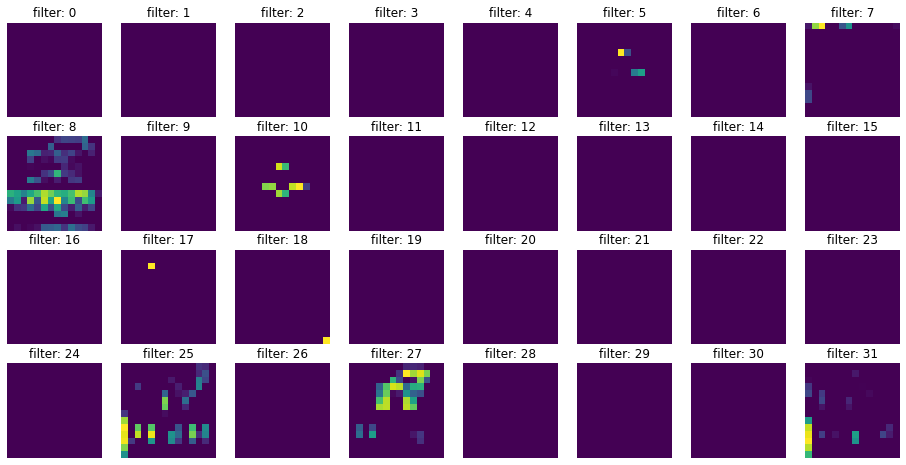

In [155]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(dropout_features[0, :, :, i])
plt.show()

## Dropout: 1

In [156]:
dropout_1_features.flatten()

array([1.0283713 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02498597, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.95962334, 1.9997762 , 0.        , 0.        , 0.        ,
       1.2645795 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 2.0329745 , 0.46188322,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.31065664, 0.6982668 , 0.35379678, 0.60906285, 0.        ,
       1.4044609 , 0.        , 0.        , 0.        , 2.739238  ,
       0.        , 0.        , 0.        , 0.        , 0.44804832,
       0.        , 2.7105544 , 0.        , 0.        , 1.3328345 ,
       0.        , 0.87514216, 1.5610485 , 0.        , 1.2476641 ,
       0.        , 0.935233  , 0.        , 0.        , 0.        ,
       1.7648567 , 0.        , 0.        , 0.        , 0.6860563 ,
       0.06782866, 1.6377159 , 0.        , 0.        , 2.01048